<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [293]:
hh_data = pd.read_csv('/Users/evgenijfilippov/Downloads/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [294]:
hh_database = hh_data.copy()
display(hh_database.head(1))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [295]:
hh_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [296]:
hh_database.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [297]:
hh_database.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Московский технически...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [298]:
def categorize_education(text):
    if pd.isna(text):
        return None
    # Берём первые два слова из строки
    first_two_words = ' '.join(text.split()[:2])
    # Маппинг первых трёх слов на нужные категории
    if first_two_words == 'Высшее образование':
        return 'высшее'
    elif first_two_words == 'Неоконченное высшее':
        return 'неоконченное высшее'
    elif first_two_words == 'Среднее специальное':
        return 'среднее специальное'
    elif first_two_words == 'Среднее образование':
        return 'среднее'
    else:
        return 'другое'  # если встречается иной формат

# Создаём новый столбец с категорией образования
hh_database['Образование'] = hh_database['Образование и ВУЗ'].apply(categorize_education)

# Проверяем полученные категории
print(hh_database['Образование'].unique())

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


In [299]:
# Удаляем исходный столбец
hh_database.drop(columns=['Образование и ВУЗ'], inplace=True)

In [300]:
# Сколько соискателей имеет средний уровень образования (школьное образование)?

count_middle_education = hh_database[hh_database['Образование'] == 'среднее'].shape[0]
print(f"Число соискателей со средним образованием: {count_middle_education}")

Число соискателей со средним образованием: 559


In [301]:
display(hh_database['Образование'].shape[0])

44744

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [302]:
# Создание столбца "Пол" при помощи лямбда выражения (тестово)
# hh_database['Пол'] = hh_database['Пол, возраст'].apply(lambda x: ' '.join(x.split(','))[0])
# print(hh_database['Пол'].head(3))

# Создание столбца "Возраст" при помощи лямбда выражения (тестово)
# hh_database['Возраст'] = hh_database['Пол, возраст'].apply(lambda x: ''.join(x.split(',')[1]).strip()[:3])
# print(hh_database['Возраст'].head(3))


# Разделяем столбец по запятой
split_df = hh_database['Пол, возраст'].str.split(' , ', expand=True)

# Преобразование пола в 'М' и 'Ж'
def transform_gender(gender_str):
    gender_str = gender_str.strip().lower()
    if 'мужчина' in gender_str:
        return 'М'
    elif 'женщина' in gender_str:
        return 'Ж'
    else:
        return None
    
# Извлечение возраста из строки
def extract_age(age_str):
    digits = ''
    for char in age_str:
        if char.isdigit():
            digits += char
    
    return int(digits) if digits else None
    
# Создание столбцов 
hh_database['Пол'] = split_df[0].apply(transform_gender)
hh_database['Возраст'] = split_df[1].apply(extract_age)

# Удаляем старый столбец
hh_database.drop(columns=['Пол, возраст'], inplace=True)

# Проверяем результат
print(hh_database[['Пол', 'Возраст']].head())
print(f"Уникальные значения в столбце 'Пол': {hh_database['Пол'].unique()}")
print(f"Тип данных в столбце 'Возраст': {hh_database['Возраст'].dtype}")

  Пол  Возраст
0   М       39
1   М       60
2   Ж       36
3   М       38
4   Ж       26
Уникальные значения в столбце 'Пол': ['М' 'Ж']
Тип данных в столбце 'Возраст': int64


In [303]:
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
female_count = hh_database[hh_database['Пол'] == 'Ж'].shape[0]
total_count = hh_database.shape[0]
percentage_female = round((female_count / total_count) * 100, 2)
print(percentage_female)

19.07


In [304]:
# Чему равен средний возраст соискателей? Ответ округлите до десятых.
mean_age = round(hh_database['Возраст'].mean(), 2)
print(mean_age)

32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [305]:
def convert_exp_to_months(exp):
    if pd.isna(exp) or exp == 'Не указано':
        return np.nan
    
    # Разбиваем на слова и ставим ограничение
    words = exp.split()[:6]  
    
    years = 0
    months = 0

    # Парсим слова по порядку для нахождения чисел перед 'лет' или 'месяцев'
    for i, word in enumerate(words):
        if word == 'лет' or word == 'год' or word == 'года':
            # Предыдущий элемент — это число лет
            try:
                years = int(words[i-1])
            except:
                years = 0
        elif word == 'месяцев' or word == 'месяц' or word == 'месяца':
            # Предыдущий элемент — это число месяцев
            try:
                months = int(words[i-1])
            except:
                months = 0
    
    total_months = years * 12 + months
    if total_months == 0:
        return np.nan
    else:
        return total_months
    

hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы'].apply(convert_exp_to_months)

# Удаление столбца "Опыт работы"
hh_database.drop(columns=['Опыт работы'], inplace=True)

# Проверка результата
print(hh_database['Опыт работы (месяц)'].head())

0    202.0
1    233.0
2    123.0
3    225.0
4     67.0
Name: Опыт работы (месяц), dtype: float64


In [306]:
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(hh_database['Опыт работы (месяц)'].median())

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [307]:
display(hh_database['Город, переезд, командировки'].loc[1])
print(hh_database['Город, переезд, командировки'].head(10))

'Королев , не готов к переезду , готов к редким командировкам'

0    Советск (Калининградская область) , не готов к...
1    Королев , не готов к переезду , готов к редким...
2    Тверь , не готова к переезду , не готова к ком...
3    Саратов , не готов к переезду , готов к редким...
4    Москва , не готова к переезду , готова к коман...
5    Старый Оскол , не готов к переезду , не готов ...
6    Москва , не готов к переезду , готов к редким ...
7    Москва ,  м. Бульвар Рокоссовского , готов к п...
8    Москва ,  м. Шоссе Энтузиастов , готов к перее...
9    Москва ,  м. Теплый Стан , не готов к переезду...
Name: Город, переезд, командировки, dtype: object


In [308]:
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]

def enumeration_city(text):
    # Первый элемент до первой запятой — город
    city = text.split(' , ')[0].strip()
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def enumeration_relocation(text):
    text = text.lower()
    negative_phrases = ['не готов к переезду', 'не готова к переезду']
    positive_phrases = ['готов к переезду', 'готова к переезду', 'хочу переехать']
    # Если есть хоть одна позитивная фраза и нет отрицательной — True
    if any(phrase in text for phrase in positive_phrases):
        if not any(phrase in text for phrase in negative_phrases):
            return True
    return False

def enumeration_business_trip(text):
    text = text.lower()
    negative_phrases = ['не готов к командировкам', 'не готова к командировкам']
    positive_phrases = ['готов к командировкам', 'готова к командировкам', 'готов к редким командировкам', 'готова к редким командировкам']
    if any(phrase in text for phrase in positive_phrases):
        if not any(phrase in text for phrase in negative_phrases):
            return True
    return False

# Применение функций
hh_database['Город'] = hh_database['Город, переезд, командировки'].apply(enumeration_city)
hh_database['Готовность к переезду'] = hh_database['Город, переезд, командировки'].apply(enumeration_relocation)
hh_database['Готовность к командировкам'] = hh_database['Город, переезд, командировки'].apply(enumeration_business_trip)


# Удаляем исходный столбец
hh_database.drop(columns=['Город, переезд, командировки'], inplace=True)

In [309]:
print(f"Уникальные значения в столбце 'Город': {hh_database['Город'].unique()}")
print(f"Готовы к переезду: {hh_database[hh_database['Готовность к переезду'] == True].shape[0]}")
print(f"Готовы к командировкам: {hh_database[hh_database['Готовность к командировкам'] == True].shape[0]}")

Уникальные значения в столбце 'Город': ['другие' 'Москва' 'город-миллионник' 'Санкт-Петербург']
Готовы к переезду: 16025
Готовы к командировкам: 31640


In [310]:
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
total_count = hh_database.shape[0]
spb_count = hh_database[hh_database['Город'] == 'Санкт-Петербург'].shape[0]

print(f"Процент соискателей из Санкт-Петербурга: {round((spb_count / total_count) * 100)}%")

Процент соискателей из Санкт-Петербурга: 11%


In [311]:
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
total_count = hh_database.shape[0]
allready_count = hh_database[(hh_database['Готовность к переезду'] == True) & 
                               (hh_database['Готовность к командировкам'] == True)].shape[0]

print(f"Процент соискателей, готовых и к переездам, и к командировкам: {round((allready_count / total_count) * 100)}%")

Процент соискателей, готовых и к переездам, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [312]:
# Преобразование признака «Занятость»
employment_cats = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']

for cat in employment_cats:
    hh_database[cat] = hh_database['Занятость'].str.contains(cat, case=False, na=False)


# Преобразование признака «График»
schedule_cats = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

for cat in schedule_cats:
    hh_database[cat] = hh_database['График'].str.contains(cat, case=False, na=False)


In [313]:
# Сколько людей ищут проектную работу и волонтерство (в обоих столбцах стоит True)?
project_and_volunteer = hh_database[(hh_database['проектная работа']) & (hh_database['волонтерство'])].shape[0]
print(f'Людей, ищущих проектную работу и волонтерство: {project_and_volunteer}')

Людей, ищущих проектную работу и волонтерство: 436


In [314]:
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
n_shift_and_flexible = hh_database[(hh_database['вахтовый метод']) & (hh_database['гибкий график'])].shape[0]
print(f'Людей, желающих работать вахтовым методом и с гибким графиком: {n_shift_and_flexible}')

Людей, желающих работать вахтовым методом и с гибким графиком: 2311


In [315]:
# Удаление
hh_database.drop(['Занятость', 'График'], axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [316]:
exchange_rates_data = pd.read_csv('/Users/evgenijfilippov/Downloads/ExchangeRates.csv', sep=',')

In [ ]:
exchange_rates = exchange_rates_data.copy()

In [318]:
# Столбец с датой обновления резюме ("Обновление резюме") приводим к дате без времени
hh_database['date'] = pd.to_datetime(hh_database['Обновление резюме']).dt.date

# Для exchange_rates: столбец 'date' формата 'день/месяц/год'
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date

/var/folders/hq/7ghdxff95z370j9kjy4jtcdr0000gn/T/ipykernel_57827/2874070531.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hh_database['date'] = pd.to_datetime(hh_database['Обновление резюме']).dt.date
/var/folders/hq/7ghdxff95z370j9kjy4jtcdr0000gn/T/ipykernel_57827/2874070531.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date


In [349]:
# Вытаскиваем сумму и валюту
def extract_salary_currency(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])
    parts = s.replace('\xa0', ' ').split()
    # Ищем первое число — сумма, последнее слово — валюта
    amount = None
    currency = None
    for part in parts:
        part_clean = part.replace(' ', '')
        if part_clean.isdigit():
            amount = int(part_clean)
    currency = parts[-1].lower()
    return pd.Series([amount, currency])

hh_database[['salary_amount', 'salary_currency']] = hh_database['ЗП'].apply(extract_salary_currency)
print(hh_database['salary_currency'].unique())

['руб.' 'бел.руб.' 'kzt' 'eur' 'usd' 'грн.' 'сум' 'kgs' 'azn']


In [359]:
# Приведение валюты к ISO-коду
currency_map = {
    'грн': 'UAH',  'usd': 'USD', 'eur': 'EUR',
    'белруб': 'BYN', 'kgs': 'KGS', 'сум': 'UZS',
    'azn': 'AZN', 'kzt': 'KZT', 'руб.': 'RUB', 'руб': 'RUB'
}

hh_database['salary_currency_iso'] = hh_database['salary_currency'].map(currency_map)

In [360]:
# Для обмена пропорции и курса по валюте
# Подготавливаем exchange_rates к объединению:
exchange_rates['currency'] = exchange_rates['currency'].str.strip().str.upper()
hh_database['salary_currency_iso'] = hh_database['salary_currency_iso'].str.upper()

# Объединяем по дате и валюте
merged_df = pd.merge(
    hh_database,
    exchange_rates[['currency','date','close','proportion']],
    left_on=['salary_currency_iso', 'date'],
    right_on=['currency', 'date'],
    how='left'
)

# Для RUB заполняем курсом 1 и пропорцией 1:
mask_rub = merged_df['salary_currency_iso'] == 'RUB'
merged_df.loc[mask_rub, 'close'] = 1.0
merged_df.loc[mask_rub, 'proportion'] = 1.0


In [361]:
# Подсчёт «ЗП (руб)»
hh_database['ЗП (руб)'] = (merged_df['salary_amount'] * merged_df['close'] / merged_df['proportion'])

In [363]:
# Очистка и удаление промежуточных столбцов
columns_to_drop = ['ЗП', 'salary_amount', 'salary_currency', 'salary_currency_iso', 'currency', 'close', 'proportion', 'date']
hh_database.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [362]:
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print(f"Медианная зарплата: {hh_database['ЗП (руб)'].median() / 1000} тыс. руб.")

Медианная зарплата: 60.0 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

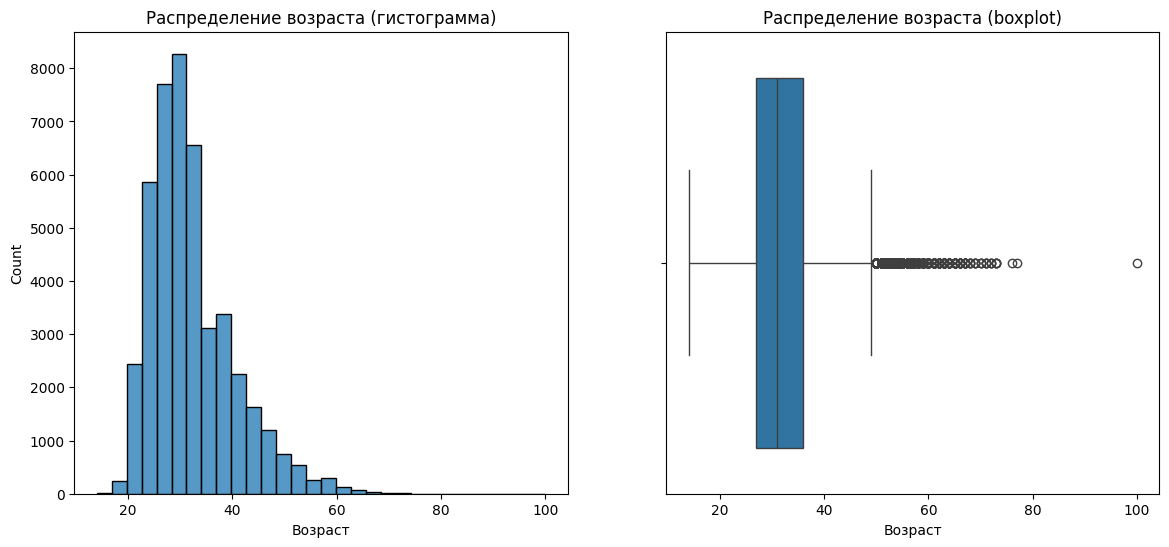

In [364]:
plt.figure(figsize=(14,6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_database['Возраст'].dropna(), bins=30, kde=False)
plt.title('Распределение возраста (гистограмма)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_database['Возраст'])
plt.title('Распределение возраста (boxplot)')

plt.show()


In [366]:
# Модалььное значение (наиболее часто встречающееся значение)
mode_age = hh_database['Возраст'].mode()[0]

# Минимум, максимум, квартиль
min_age = hh_database['Возраст'].min()
max_age = hh_database['Возраст'].max()
q1 = hh_database['Возраст'].quantile(0.25)
q3 = hh_database['Возраст'].quantile(0.75)

print(f"Модальное значение: {mode_age}")
print(f"Минимум: {min_age}, максимум: {max_age}")
print(f"Интервал большинства (25..75%): {q1}..{q3}")


Модалььное значение: 30
Минимум: 14, максимум: 100
Интервал большинства (25..75%): 27.0..36.0


Наиболее частый возраст составляет примерно 30 лет — видно по пику гистограммы в диапазоне 30–31 года.

Основной интервал возраста
* Большинство соискателей находятся в интервале примерно от 25 до 40 лет.

* Наибольшая концентрация наблюдается между 27 и 36 годами.

* Средний возраст (визуально по гистограмме и boxplot) примерно 30–35 лет.

Предельные значения
* Минимальный возраст: около 18 лет.

* Максимальный возраст: встречаются единичные выбросы ближе к 100 годам (видно на boxplot).

* Основной диапазон — до примерно 60 лет, после чего частота резко падает.

Аномалии
* На boxplot видно существенное количество выбросов справа от основного "ящика" (больше 60–65 лет).

* Есть отдельные случаи экстремально высокого возраста (например, ~100), которые представляют собой явные аномалии, вероятно, из-за ошибки ввода или особой категории данных.

* Также можно отметить небольшой "хвост" влево, но он не выражен.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

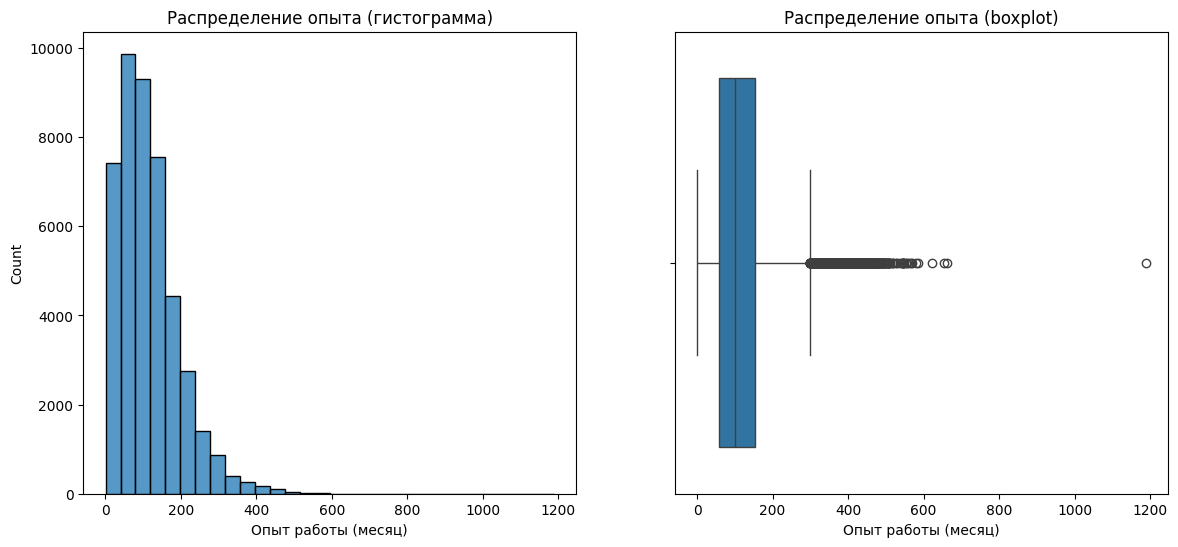

In [367]:
plt.figure(figsize=(14,6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_database['Опыт работы (месяц)'].dropna(), bins=30)
plt.title('Распределение опыта (гистограмма)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_database['Опыт работы (месяц)'])
plt.title('Распределение опыта (boxplot)')

plt.show()


In [369]:
mode_exp = hh_database['Опыт работы (месяц)'].mode()[0]

# Минимум, максимум, квартиль
min_exp = hh_database['Опыт работы (месяц)'].min()
max_exp = hh_database['Опыт работы (месяц)'].max()
q1 = hh_database['Опыт работы (месяц)'].quantile(0.25)
q3 = hh_database['Опыт работы (месяц)'].quantile(0.75)

print(f"Модальное значение: {mode_exp}")
print(f"Минимум: {min_exp}, максимум: {max_exp}")
print(f"Интервал большинства (25..75%): {q1}..{q3}")


Модальное значение: 81.0
Минимум: 1.0, максимум: 1188.0
Интервал большинства (25..75%): 57.0..154.0


Мода распределения
* Наибольшее количество соискателей имеют опыт работы около 100–120 месяцев (~8–10 лет) — это видно по пику на гистограмме. Точное модальное значение можно узнать вызвав mode() по колонке.

Основной интервал
* Большинство соискателей имеют опыт от 30 до примерно 180 месяцев (от 2,5 до 15 лет).

* Основной массив данных сконцентрирован левее 200 месяцев, что видно и на гистограмме, и на boxplot.

Предельные значения
* Минимальное значение — 0 или близко к нулю (есть совсем без опыта или с минимальным стажем).

* Максимальный опыт сильно превышает 600 месяцев (есть значения >1 000 — это 80+ лет стажа).

Аномалии
* Выбросы с очень большим опытом — например, 700, 1000 и более месяцев (то есть стаж 60–80 лет и более).

* Такие значения скорее всего являются ошибками заполнения, потому что практический трудовой стаж редко превышает 40–50 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


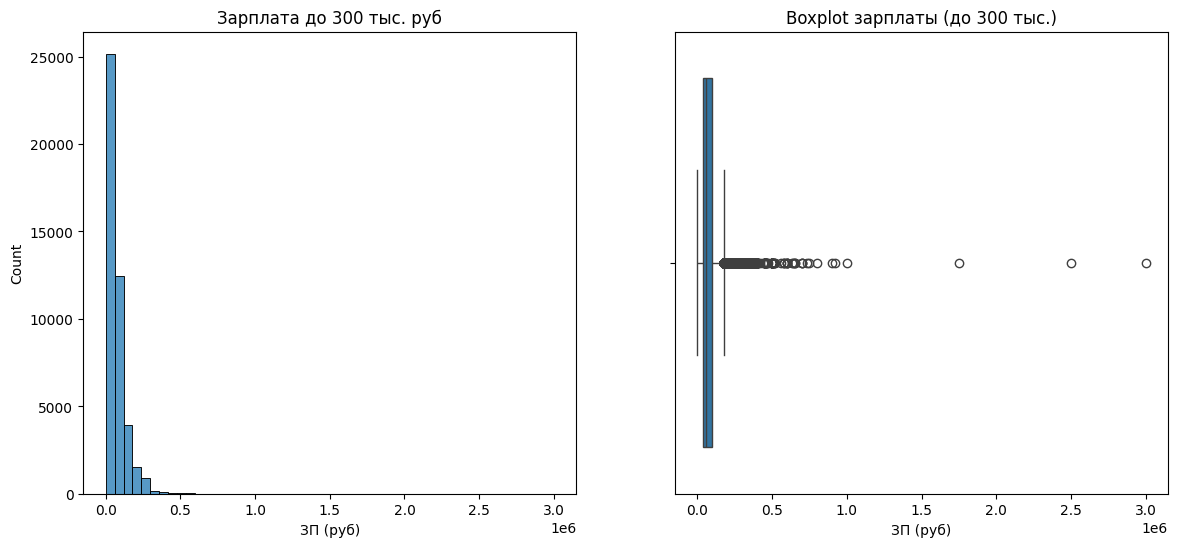

In [373]:
plt.figure(figsize=(14,6))

upper_limit = 3000000  # Можно подвинуть порог

filtered_salary = hh_database[hh_database['ЗП (руб)'] <= upper_limit]['ЗП (руб)'].dropna()

plt.subplot(1, 2, 1)
sns.histplot(filtered_salary, bins=50)
plt.title('Зарплата до 300 тыс. руб')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_salary)
plt.title('Boxplot зарплаты (до 300 тыс.)')

plt.show()


In [371]:
min_income = hh_database['ЗП (руб)'].min()
max_income = hh_database['ЗП (руб)'].max()
q1 = hh_database['ЗП (руб)'].quantile(0.25)
q3 = hh_database['ЗП (руб)'].quantile(0.75)

print(f"Минимум: {min_income}, максимум: {max_income}")
print(f"Интервал большинства (25..75%): {q1}..{q3}")

Минимум: 1.0, максимум: 24304876.0
Интервал большинства (25..75%): 40000.0..95000.0


Мода распределения
* Мода находится на интервале 40 000–50 000 руб. Это видно по максимальному столбцу гистограммы, где наиболее часто встречаются зарплатные ожидания.

Предельные значения признака
* Минимальная зарплата — около 1 000 руб.

* Максимальная зарплата среди соискателей — порядка 300 000 руб. (для визуализированного интервала), однако в общей базе встречаются и значения в миллионах.

* Основной интервал, где находятся зарплатные ожидания большинства соискателей, — от 30 000 до 100 000 руб. Больше всего заявок с ожиданиями 35–90 тысяч руб.

Аномалии для признака заработной платы
* На графике видны отдельные выбросы среди высоких зарплат (от 150 000 до 300 000 руб.) — такие значения встречаются редко, но попадаются.

* В полной выборке аномалиями будут запросы выше 300 000 руб., вплоть до миллионов — это часто явные ошибки ввода или неадекватные ожидания.

* К выбросам можно также отнести слишком низкие значения (например, ниже 5 000 руб.), но они встречаются реже.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

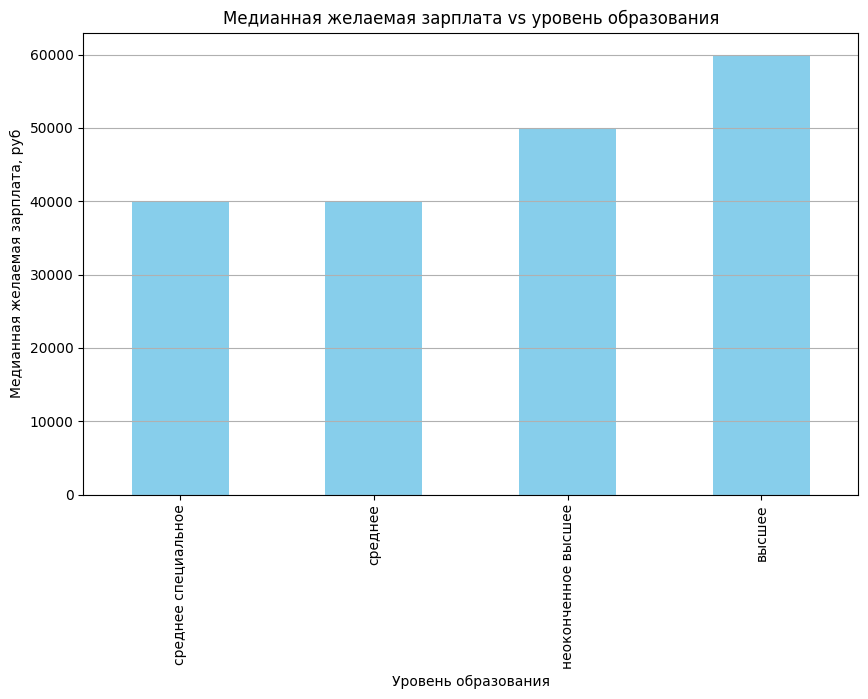

In [374]:
# Фильтрация данных: зарплата < 1 млн руб
filtered_df = hh_database[hh_database['ЗП (руб)'] < 1_000_000]

# Группировка и расчёт медианы по уровню образования
median_by_education = filtered_df.groupby('Образование')['ЗП (руб)'].median().sort_values()

# Построение столбчатой диаграммы
plt.figure(figsize=(10,6))
median_by_education.plot(kind='bar', color='skyblue')
plt.ylabel('Медианная желаемая зарплата, руб')
plt.xlabel('Уровень образования')
plt.title('Медианная желаемая зарплата vs уровень образования')
plt.grid(axis='y')
plt.show()


Сделайте выводы по представленной диаграмме:


Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?

Среднее и сренее специальное образование менее требовательны к ЗП, чем высшее.


Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

Конечно важен.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

/var/folders/hq/7ghdxff95z370j9kjy4jtcdr0000gn/T/ipykernel_57827/2984934436.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




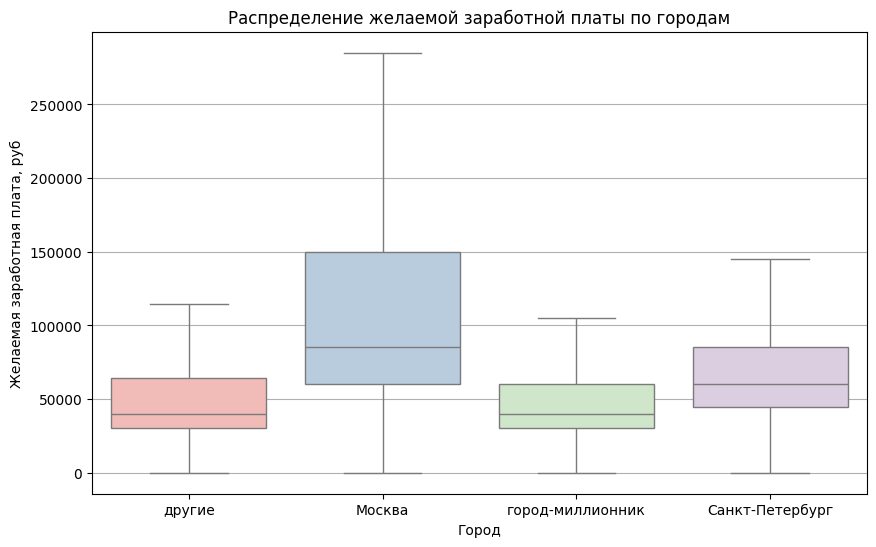

In [383]:
# Фильтруем данные по зарплате < 1 млн
filtered = hh_database[hh_database['ЗП (руб)'] < 1000000]

plt.figure(figsize=(10,6))
sns.boxplot(x='Город', y='ЗП (руб)', data=filtered, showfliers=False, palette='Pastel1')
plt.ylabel('Желаемая заработная плата, руб')
plt.xlabel('Город')
plt.title('Распределение желаемой заработной платы по городам')
plt.grid(axis='y')
plt.show()


In [387]:
# Фильтрация по зарплате < 1 млн руб.
filtered = hh_database[hh_database['ЗП (руб)'] < 1_000_000]

# Группировка и поиск
city_zp = filtered.groupby('Город')['ЗП (руб)'].max()
max_city = city_zp.idxmax()
max_salary = city_zp.max()

print(f'Наибольшая желаемая заработная плата — в категории города: {max_city} ({int(max_salary)} руб.)')


Наибольшая желаемая заработная плата — в категории города: другие (923983 руб.)


Признак города критически важен при прогнозировании желаемой заработной платы:

* Уровень жизни и зарплатные ожидания заметно различаются между городами.

* Один и тот же опыт, профессия или квалификация будет иначе оцениваться в столице, миллионнике или региональном центре.

* На основании визуализации видно, что разница медиан между категориями может составлять десятки тысяч рублей, а в размаху — даже сотни тысяч.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

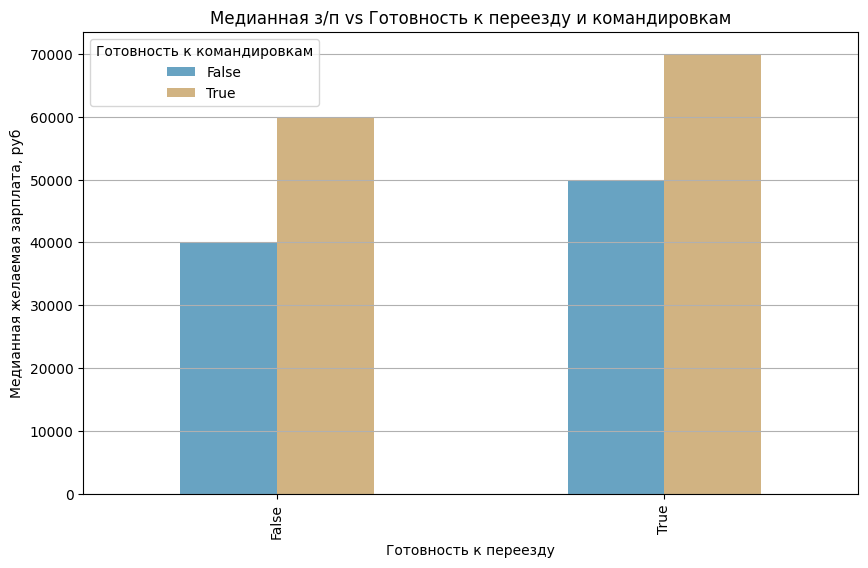

In [388]:
# Группировка данных по двум признакам
grouped = hh_database[hh_database['ЗП (руб)'] < 1_000_000].groupby(
    ['Готовность к переезду', 'Готовность к командировкам']
)['ЗП (руб)'].median().unstack()

# Построение диаграммы
grouped.plot(kind='bar', figsize=(10,6), color=['#68a3c2', '#d1b382'])
plt.ylabel('Медианная желаемая зарплата, руб')
plt.xlabel('Готовность к переезду')
plt.title('Медианная з/п vs Готовность к переезду и командировкам')
plt.legend(title='Готовность к командировкам')
plt.grid(axis='y')
plt.show()


In [391]:
median_salary = hh_database[
    (hh_database['Готовность к переезду'] == True) &
    (hh_database['Готовность к командировкам'] == True)
]['ЗП (руб)'].median()

median_salary_thousands = round(median_salary / 1000)
print(median_salary_thousands)


70


Готовность к мобильности (переезд, командировки) часто сопровождается более высокими зарплатными ожиданиями: мобильные специалисты ценят себя выше и запрашивают большие суммы. Это четко прослеживается на многоуровневой столбчатой диаграмме.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

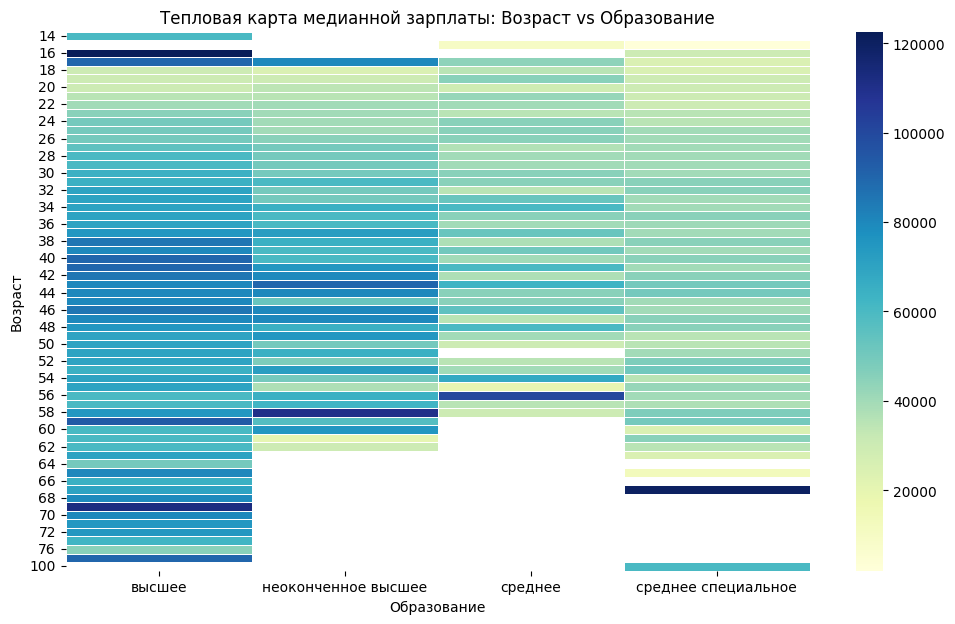

In [392]:
# Ограничиваем аномалии: зарплату < 1 млн
filtered = hh_database[hh_database['ЗП (руб)'] < 1_000_000]

# Строим сводную таблицу (pivot table)
pivot = pd.pivot_table(
    filtered, 
    values='ЗП (руб)', 
    index='Возраст', 
    columns='Образование', 
    aggfunc='median'
)

# Тепловая карта
plt.figure(figsize=(12, 7))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Тепловая карта медианной зарплаты: Возраст vs Образование')
plt.ylabel('Возраст')
plt.xlabel('Образование')
plt.show()


Для категории высшего образования наблюдается самый быстрый карьерный рост

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

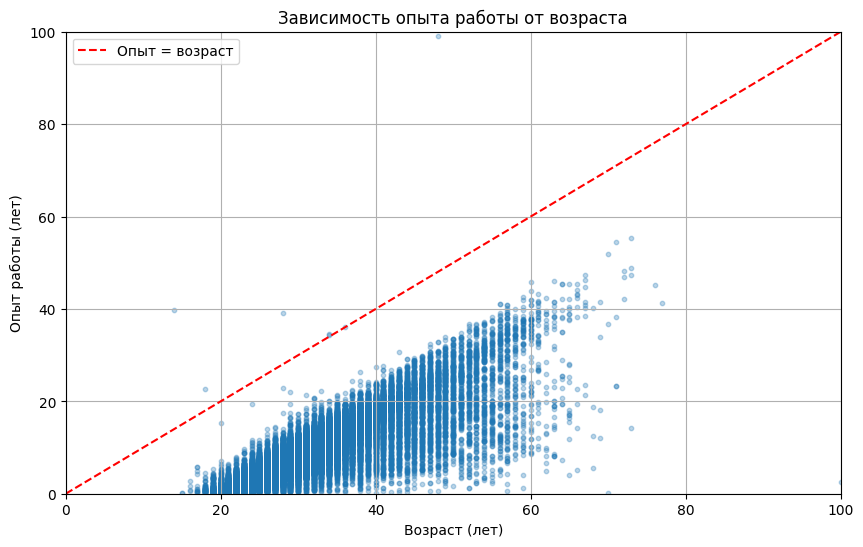

In [393]:
# Переводим опыт работы из месяцев в годы
hh_database['Опыт_лет'] = hh_database['Опыт работы (месяц)'] / 12

plt.figure(figsize=(10,6))
plt.scatter(hh_database['Возраст'], hh_database['Опыт_лет'], alpha=0.3, s=10)
plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (лет)')
plt.title('Зависимость опыта работы от возраста')

# Прямая y = x (опыт работы равен возрасту)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = возраст')

plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [401]:
# Проверяем количество полных дубликатов
n_duplicates = hh_database.duplicated().sum()

print(f'Найдено полных дубликатов: {n_duplicates}')

# Удаляем полные дубликаты и сбрасываем индексы
hh_database = hh_database.drop_duplicates().reset_index(drop=True)


Найдено полных дубликатов: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [402]:
missing_counts = hh_database.isnull().sum()
print(missing_counts[missing_counts > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
ЗП (руб)                           402
Опыт_лет                           168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [404]:
# Удаляем строки с пропусками в местах работы и должности
hh_database = hh_database.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполняем пропуски в опыте медианным значением
median_experience = hh_database['Опыт работы (месяц)'].median()
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].fillna(median_experience)

# Вычисляем среднее после заполнения
mean_experience = round(hh_database['Опыт работы (месяц)'].mean())

print(mean_experience)

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [408]:
outliers = hh_database[(hh_database['ЗП (руб)'] > 1_000_000) | (hh_database['ЗП (руб)'] < 1000)]
n_outliers = outliers.shape[0]

hh_database_cleaned = hh_database.drop(outliers.index)

print(f"Найдено выбросов: {n_outliers}")

Найдено выбросов: 0


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [409]:
# Переводим опыт работы из месяцев в года
hh_database['Опыт_лет'] = hh_database['Опыт работы (месяц)'] / 12

# Поиск выбросов: опыт больше или равен возрасту
outliers = hh_database[hh_database['Опыт_лет'] >= hh_database['Возраст']]
n_outliers = outliers.shape[0]

# Удаление таких выбросов
hh_database_cleaned = hh_database.drop(outliers.index).reset_index(drop=True)

print(f'Найдено выбросов с опытом >= возрасту: {n_outliers}')

Найдено выбросов с опытом >= возрасту: 6


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

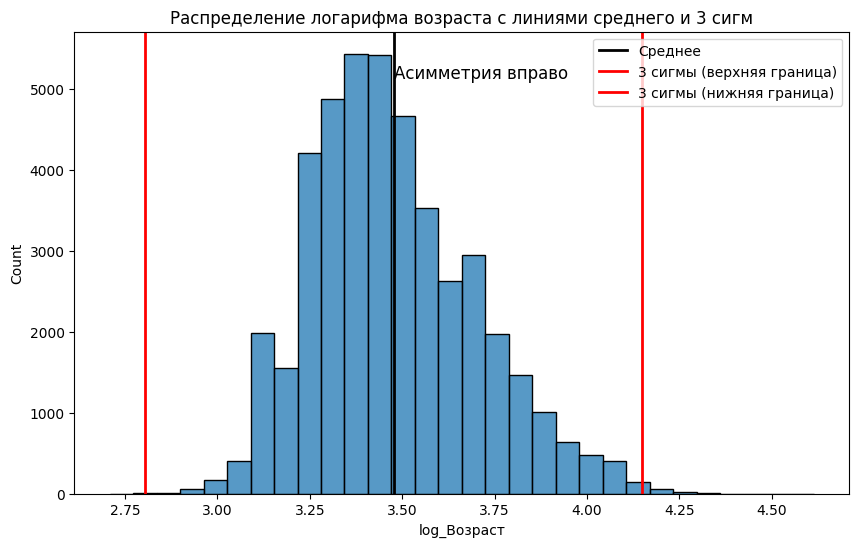

Найдено выбросов (возраст по логарифму > mean + 4*std): 1
       Возраст  log_Возраст
33499      100     4.615121


In [410]:
# Логарифмируем возраст (добавим 1, чтобы избежать log(0))
hh_database['log_Возраст'] = np.log(hh_database['Возраст'] + 1)

# Строим гистограмму в логарифмическом масштабе
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(hh_database['log_Возраст'], bins=30, ax=ax)
ax.axvline(hh_database['log_Возраст'].mean(), color='k', lw=2, label='Среднее')
mean = hh_database['log_Возраст'].mean()
std = hh_database['log_Возраст'].std()
ax.axvline(mean + 3 * std, color='r', lw=2, label='3 сигмы (верхняя граница)')
ax.axvline(mean - 3 * std, color='r', lw=2, label='3 сигмы (нижняя граница)')

# Комментарий к графику о направлении асимметрии
ax.text(mean, ax.get_ylim()[1] * 0.9, 'Асимметрия вправо', fontsize=12)

plt.title('Распределение логарифма возраста с линиями среднего и 3 сигм')
plt.legend()
plt.show()

# Находим выбросы с использованием z-отклонения и "послабления" 4 сигмы сверху
z_scores = (hh_database['log_Возраст'] - mean) / std
outliers = hh_database[z_scores > 4]

print(f"Найдено выбросов (возраст по логарифму > mean + 4*std): {outliers.shape[0]}")

# Выводим таблицу с выбросами
print(outliers[['Возраст', 'log_Возраст']])


Распределение логарифма возраста асимметрично вправо — основной массив данных сосредоточен в интервале около среднего, при этом "хвост" распределения уходит в область больших значений, то есть встречаются значительно более высокие возраста, чем можно было бы ожидать для типичного соискателя.

In [411]:
# Поиск и удаление выбросов методом z-отклонения (послабление — 4 сигмы вправо)
mean = hh_database['log_Возраст'].mean()
std = hh_database['log_Возраст'].std()
z_scores = (hh_database['log_Возраст'] - mean) / std

# Выбросы — лог возраст > mean + 4*std (только правый хвост)
outliers = hh_database[z_scores > 4]

# Удаление выбросов из данных
hh_database_cleaned = hh_database[z_scores <= 4].reset_index(drop=True)

# Таблица с выбросами
outliers_table = outliers[['Возраст', 'log_Возраст']]
print(outliers_table)


       Возраст  log_Возраст
33499      100     4.615121


«Распределение асимметрично вправо, хвост длиннее в области больших возрастов.
Аномалиями считаются соискатели с возрастом 80 лет и выше — их резюме автоматически удалены как выбросы (правый хвост, z-отклонение > 4).»

Таблица выбросов показывает конкретные значения возраста (обычно 80–100+), которые исключены из анализа.